In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import mlxtend
import seaborn as sns
from keras.datasets import cifar10
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector, SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

170498071/170498071 [==============================] - 3s 0us/step
Train: X=(50000, 16, 16, 1), y=(50000, 1)
Test: X=(10000, 16, 16, 1), y=(10000, 1)


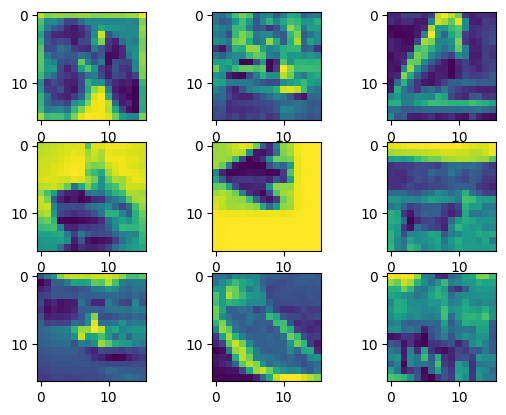

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = tf.image.resize(X_train, (16, 16)).numpy()
X_test = tf.image.resize(X_test, (16, 16)).numpy()
X_train = tf.image.rgb_to_grayscale(X_train).numpy()
X_test = tf.image.rgb_to_grayscale(X_test).numpy()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(np.round(X_train[i+500]))
# show the figure
plt.show()

In [ ]:
X = (X_train[:1000]/255.0).reshape((len(X_train[:1000]), -1))
print(X.shape)
y = y_train[:1000]
print(X.shape)

(1000, 256)
(1000, 256)


In [ ]:
X_test = (X_test[:200]/255.0).reshape((len(X_test[:200]), -1))
print(X_test.shape)
y_test = y_test[:200]
print(y_test.shape)

(200, 256)
(200, 1)


In [ ]:
ranking = []

In [ ]:
### Select From Model LinearSVC ###
sfm_lin = SelectFromModel(estimator=LinearSVC(penalty = 'l2', loss =  'squared_hinge', dual = False)).fit(X, y)
ranking.append((sfm_lin.get_support().reshape(X_train[0].shape), 'SelectFromModel LinearSVC'))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
### Select From Model RFC ###
sfm_rfc = SelectFromModel(estimator=RandomForestClassifier()).fit(X, y)
ranking.append((sfm_rfc.get_support().reshape(X_train[0].shape), 'SelectFromModel RFC'))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [ ]:
### Univariate Feature Selection ###
selector = SelectKBest(score_func=f_classif, k=128).fit(X,y)
ranking.append((selector.get_support().reshape(X_train[0].shape), 'SelectKBest'))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
### Sequential Feature Selector with forward direction ###
knn = KNeighborsClassifier(n_neighbors=3)
sfs_for = SequentialFeatureSelector(knn, n_features_to_select=128, direction='forward', n_jobs=-1).fit(X, y)
ranking.append((sfs_for.get_support().reshape(X_train[0].shape), 'Forward SFS'))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
### Sequential Feature Selector with backward direction ###
knn = KNeighborsClassifier(n_neighbors=3)
sfs_back = SequentialFeatureSelector(knn, n_features_to_select=128, direction='backward', n_jobs=-1).fit(X,y)
ranking.append((sfs_back.get_support().reshape(X_train[0].shape), 'Backward SFS'))

In [ ]:
### Recursive Feature Elimination ###
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1, step=1, verbose = 2)
rfe.fit(X, y)

Fitting estimator with 256 features.
Fitting estimator with 255 features.
Fitting estimator with 254 features.
Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
F

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=1, verbose=2)

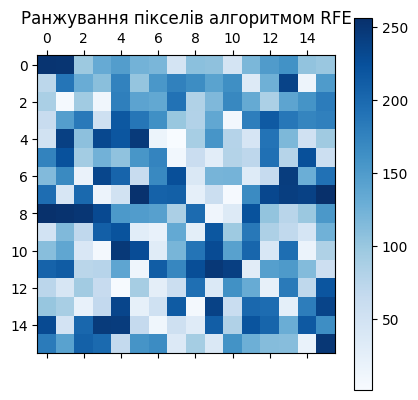

In [ ]:
plt.matshow((rfe.ranking_).reshape(X_train[0].shape), cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ранжування пікселів алгоритмом RFE")
plt.show()

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=128, step=1, verbose = 2)
rfe.fit(X, y)
ranking.append((rfe.get_support().reshape(X_train[0].shape), 'RFE'))

Fitting estimator with 256 features.
Fitting estimator with 255 features.
Fitting estimator with 254 features.
Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
F

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=128, verbose=2)

In [ ]:
### Recursive Feature Elimination with cross-validation###
rfecv = RFECV(estimator=DecisionTreeClassifier(), step=1, verbose = 2, cv = 5)
rfecv.fit(X, y)
ranking.append((rfecv.get_support().reshape(X_train[0].shape), 'RFECV'))

Fitting estimator with 256 features.
Fitting estimator with 255 features.
Fitting estimator with 254 features.
Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
Fitting estimator with 245 features.
Fitting estimator with 244 features.
Fitting estimator with 243 features.
Fitting estimator with 242 features.
Fitting estimator with 241 features.
Fitting estimator with 240 features.
Fitting estimator with 239 features.
Fitting estimator with 238 features.
Fitting estimator with 237 features.
Fitting estimator with 236 features.
Fitting estimator with 235 features.
Fitting estimator with 234 features.
Fitting estimator with 233 features.
Fitting estimator with 232 features.
Fitting estimator with 231 features.
Fitting estimator with 230 features.
F

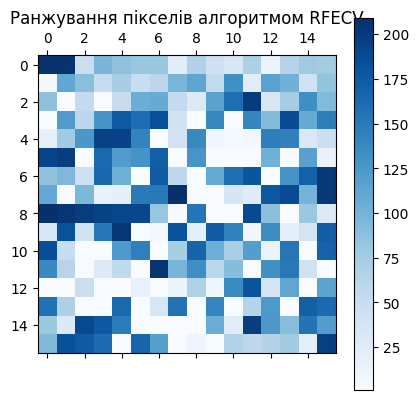

In [ ]:
plt.matshow((rfecv.ranking_).reshape(X_train[0].shape), cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ранжування пікселів алгоритмом RFECV")
plt.show()

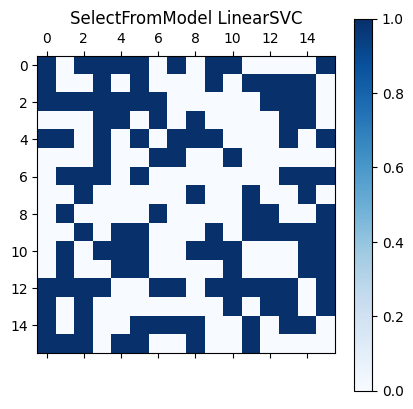

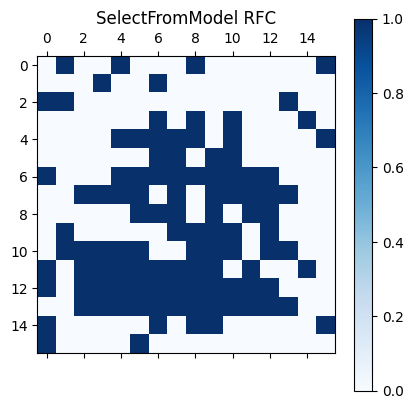

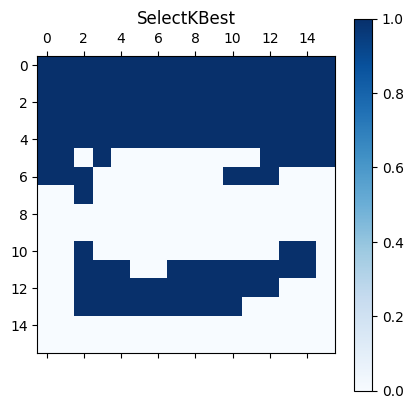

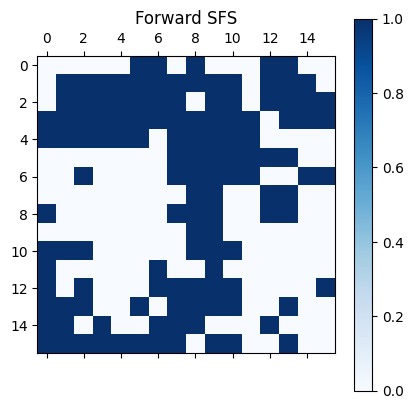

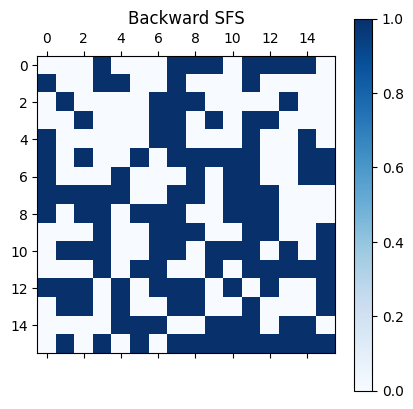

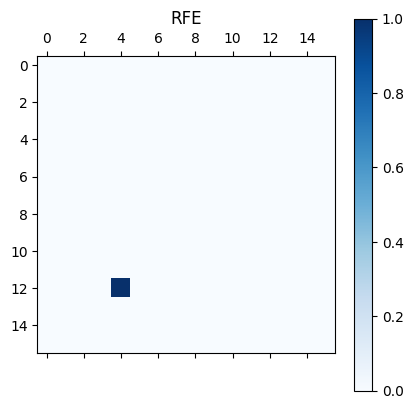

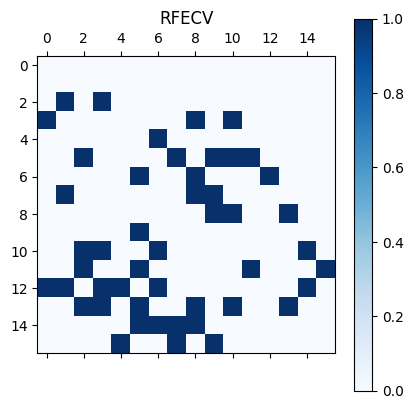

In [ ]:
### plot selected features ###
for i in range(len(ranking)):
  plt.matshow(ranking[i][0], cmap=plt.cm.Blues)
  plt.colorbar()
  plt.title(ranking[i][1])
  plt.show()

In [ ]:
### Finding accuracy of models on selected features for every method ###
from mlxtend.feature_selection import ColumnSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


full = [i for i in range(256)]
accuracy_diff = []
labels = []

for rank in ranking:
  index_cols = [i for i,x in enumerate((rank[0]).reshape(X[0].shape)) if x]
  acc = []
  for array in [full, index_cols]:
    columns = ColumnSelector(cols=(array)).fit_transform(X)
    columns_Test = ColumnSelector(cols=(array)).fit_transform(X_test)
    res = ().fit(columns, y)
    predictions = res.predict(columns_Test)
    acc.append(accuracy_score(y_test, predictions))
  accuracy_diff.append(acc)
  labels.append(rank[1])

<ipython-input-125-533d0034a48e>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  res = RandomForestClassifier().fit(columns, y)
<ipython-input-125-533d0034a48e>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  res = RandomForestClassifier().fit(columns, y)
<ipython-input-125-533d0034a48e>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  res = RandomForestClassifier().fit(columns, y)
<ipython-input-125-533d0034a48e>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  res = RandomForestClassifier().fit(columns, y)
<ipython-input-125-533d0034a48e>:17:

In [ ]:
### saving all data here to not retrain feature extractors ###
labels = ['SelectFromModel LinearSVC', 'SelectFromModel RFC', 'SelectKBest', 'Forward SFS', 'Backward SFS', 'RFE', 'RFECV']
accuracy_diff_lr = [[0.24, 0.255], [0.24, 0.245], [0.24, 0.21], [0.24, 0.26], [0.24, 0.235], [0.24,0.23], [0.24, 0.23]]
accuracy_diff_rfc = [[0.265, 0.27], [0.265, 0.285], [0.265, 0.175], [0.265, 0.25],[0.265, 0.25], [0.265, 0.29], [0.265, 0.275]]

<ipython-input-30-ef90c40a7ee7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  horizontal_bar_plot = sns.barplot(x = 'Accuracy', y = 'Methods', data=df, palette="vlag")


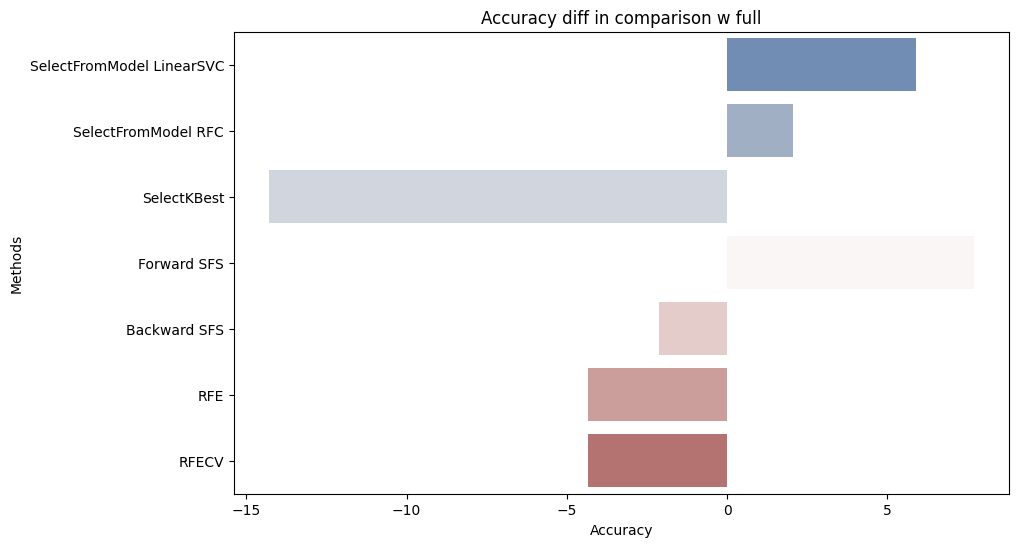

<ipython-input-30-ef90c40a7ee7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  horizontal_bar_plot = sns.barplot(x = 'Accuracy', y = 'Methods', data=df, palette="vlag")


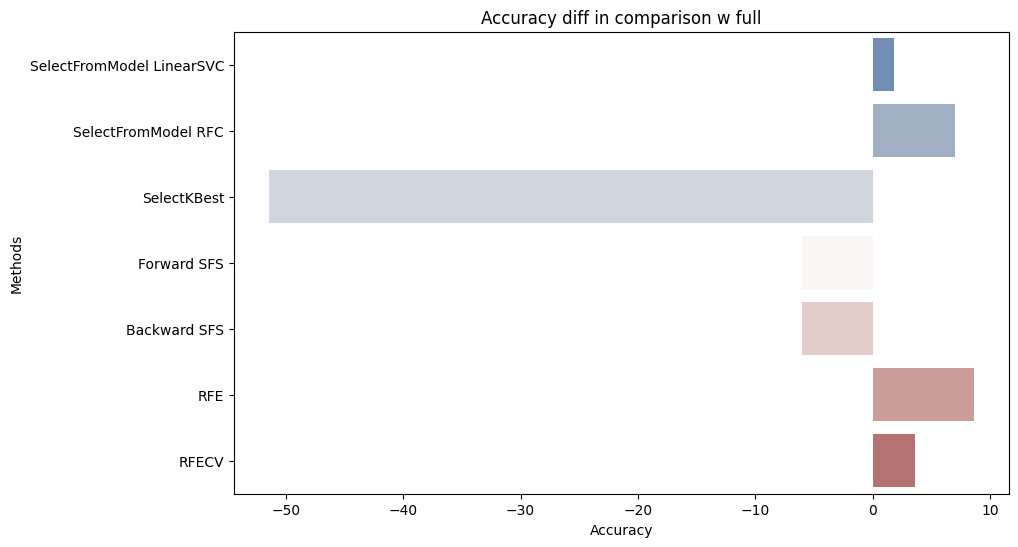

In [ ]:
### comparison plot of method impact to the model
for array in [accuracy_diff_lr, accuracy_diff_rfc]:
  accuracy_diff = [(item[1]-item[0])*100/item[1] for item in array]

  data = {
    'Methods': labels,
    'Accuracy': accuracy_diff,
    }
  df = pd.DataFrame(data)
  plt.figure(figsize=(10, 6))
  horizontal_bar_plot = sns.barplot(x = 'Accuracy', y = 'Methods', data=df, palette="vlag")
  plt.title('Accuracy diff in comparison w full')
  plt.xlabel('Accuracy')
  plt.ylabel('Methods')
  plt.show()

**Creating a dataset using make_classification**

In [ ]:
X_gen, y_gen = make_classification(
    n_samples=500,
    n_features=20,
    n_informative=4,
    n_redundant=2,
    n_repeated=0,
    n_classes=10,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=0,
)
X_test = X_gen[400:]
y_test = y_gen[400:]
X_gen = X_gen[:400]
y_gen = y_gen[:400]

In [ ]:
ranking_gen = []

In [ ]:
### Recursive Feature Elimination with cross-validation###
rfecv = RFECV(estimator=LogisticRegression(), step=1, verbose = 2, cv = 5)
rfecv.fit(X_gen, y_gen)
ranking_gen.append((rfecv.get_support(), 'RFECV'))
rfecv.ranking_

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.


array([ 4,  1, 14,  1, 12,  2,  5,  7, 11, 13,  6,  8, 17,  1, 16, 10, 15,
        1,  3,  9])

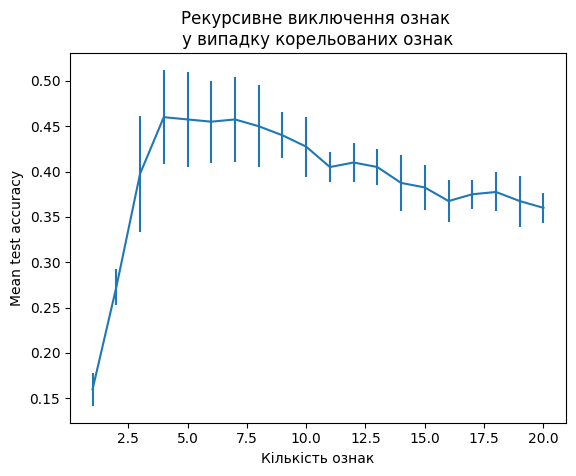

In [ ]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Кількість ознак")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Рекурсивне виключення ознак \nу випадку корельованих ознак")
plt.show()

In [ ]:
### Recursive Feature Elimination ###
rfe = RFE(estimator=DecisionTreeClassifier(), step=1, verbose = 2)
rfe.fit(X_gen, y_gen)
ranking_gen.append((rfecv.get_support(), 'RFE'))
rfe.ranking_

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


array([ 1,  1,  9,  1,  6,  1, 10,  2,  1,  8,  7,  1,  4,  1,  5,  1, 11,
        1,  1,  3])

In [ ]:
### Univariate Feature Selection ###
selector = SelectKBest(f_classif, k='all')
selector.fit(X_gen, y_gen)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
ranking_gen.append((selector.get_support(), 'SelectKBest'))

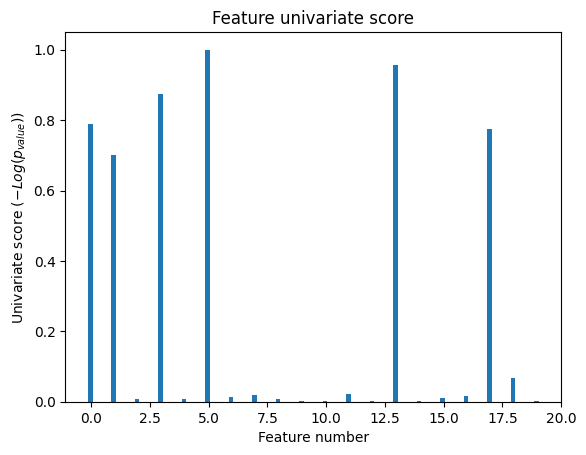

In [ ]:
X_indices = np.arange(X_gen.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [ ]:
### Sequential Feature Selection ###
sfs_backward = SequentialFeatureSelector(
    DecisionTreeClassifier(), n_features_to_select = 7, direction="backward").fit(X_gen, y_gen)
ranking_gen.append((sfs_backward.get_support(), 'SFS Backward'))
sfs_backward.get_support()

array([False,  True, False,  True, False,  True, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False,  True])

In [ ]:
### Sequential Feature Selection ###
sfs_forward = SequentialFeatureSelector(
    estimator = DecisionTreeClassifier(), n_features_to_select = 7, direction="forward").fit(X_gen, y_gen)
ranking_gen.append((sfs_forward.get_support(), 'SFS Forward'))
sfs_forward.get_support()

array([ 1,  3,  5,  8, 11, 13, 17])

In [ ]:
### Select from model with l2 ###
sfm_lin = SelectFromModel(estimator=LinearSVC(penalty = 'l2', loss =  'squared_hinge', dual = True)).fit(X_gen, y_gen)
sfm_lin.get_support()
ranking_gen.append((sfm_lin.get_support(), 'SelectFromModel LinearSVC'))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
### Select from model with RFC estimator ###
sfm_rfc = SelectFromModel(estimator=RandomForestClassifier()).fit(X_gen, y_gen)
sfm_rfc.get_support()
ranking_gen.append((sfm_rfc.get_support(), 'SelectFromModel RFC'))

In [ ]:
### mlxtend SequentialFeatureSelector ###
from mlxtend import feature_selection
sfs = mlxtend.feature_selection.SequentialFeatureSelector(estimator = DecisionTreeClassifier(), k_features = 'best', verbose = 2).fit(X_gen,y_gen)


[2024-05-28 19:40:55] Features: 1/20 -- score: 0.18
[2024-05-28 19:40:55] Features: 2/20 -- score: 0.2725
[2024-05-28 19:40:56] Features: 3/20 -- score: 0.3775
[2024-05-28 19:40:56] Features: 4/20 -- score: 0.42000000000000004
[2024-05-28 19:40:56] Features: 5/20 -- score: 0.4574999999999999
[2024-05-28 19:40:57] Features: 6/20 -- score: 0.45499999999999996
[2024-05-28 19:40:57] Features: 7/20 -- score: 0.45
[2024-05-28 19:40:57] Features: 8/20 -- score: 0.4600000000000001
[2024-05-28 19:40:58] Features: 9/20 -- score: 0.445
[2024-05-28 19:40:58] Features: 10/20 -- score: 0.4425
[2024-05-28 19:40:58] Features: 11/20 -- score: 0.4375
[2024-05-28 19:40:58] Features: 12/20 -- score: 0.43499999999999994
[2024-05-28 19:40:58] Features: 13/20 -- score: 0.4225
[2024-05-28 19:40:59] Features: 14/20 -- score: 0.4225
[2024-05-28 19:40:59] Features: 15/20 -- score: 0.4
[2024-05-28 19:40:59] Features: 16/20 -- score: 0.39499999999999996
[2024-05-28 19:40:59] Features: 17/20 -- score: 0.38
[2024-0

In [ ]:
selected_features_indices = sfs.k_feature_idx_
selected_features_indices


(0, 2, 3, 5, 6, 13, 16, 17)

In [ ]:
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for rank in ranking_gen:
  index_cols = [i for i,x in enumerate((rank[0])) if x]
  acc = []
  for array in [full, index_cols]:
    columns = ColumnSelector(cols=(array)).fit_transform(X_gen)
    columns_test = ColumnSelector(cols=(array)).fit_transform(X_test)
    res = RandomForestClassifier().fit(columns, y_gen)
    predictions = res.predict(columns_test)
    acc.append(accuracy_score(y_test, predictions))
  accuracy_diff.append(acc)
  labels.append(rank[1])

In [ ]:
accuracy_diff_lr = [[0.49, 0.49], [0.49, 0.49], [0.49, 0.49], [0.49, 0.43], [0.49, 0.45], [0.49, 0.54], [0.49, 0.49], [0.49, 0.43]]
labels = ['RFECV',
 'RFE',
 'SelectKBest',
 'SFS Backward',
 'SFS Forward',
 'SelectFromModel LinearSVC',
 'SelectFromModel RFC',
 'SFS mlxtend']
accuracy_diff_rfc = [[0.52, 0.52], [0.56, 0.52], [0.55, 0.56], [0.53, 0.5], [0.55, 0.55], [0.54, 0.59], [0.52, 0.62], [0.51, 0.52]]

<ipython-input-61-ef90c40a7ee7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  horizontal_bar_plot = sns.barplot(x = 'Accuracy', y = 'Methods', data=df, palette="vlag")


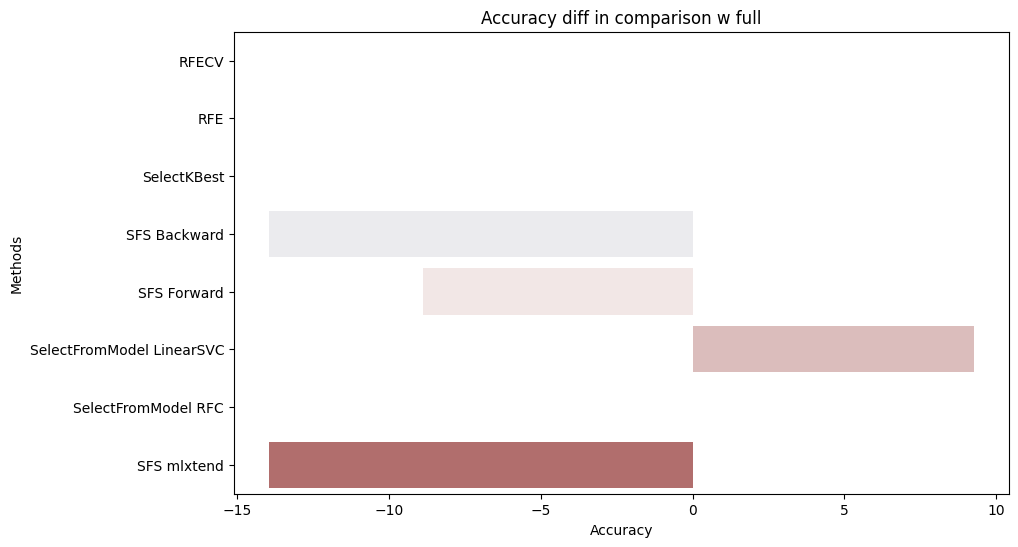

<ipython-input-61-ef90c40a7ee7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  horizontal_bar_plot = sns.barplot(x = 'Accuracy', y = 'Methods', data=df, palette="vlag")


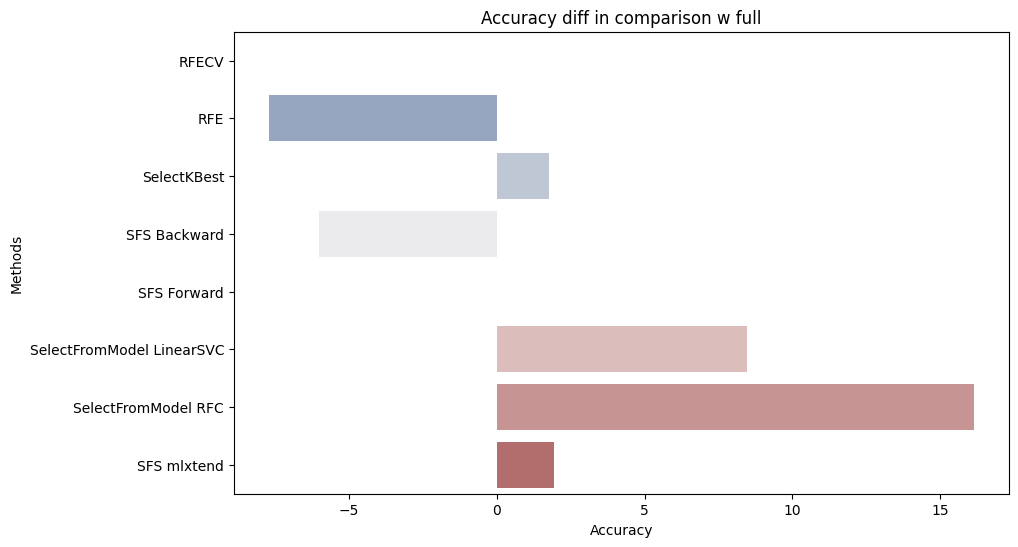

In [ ]:
for array in [accuracy_diff_lr, accuracy_diff_rfc]:
  accuracy_diff = [(item[1]-item[0])*100/item[1] for item in array]

  data = {
    'Methods': labels,
    'Accuracy': accuracy_diff,
    }
  df = pd.DataFrame(data)
  plt.figure(figsize=(10, 6))
  horizontal_bar_plot = sns.barplot(x = 'Accuracy', y = 'Methods', data=df, palette="vlag")
  plt.title('Accuracy diff in comparison w full')
  plt.xlabel('Accuracy')
  plt.ylabel('Methods')
  plt.show()

***Generating a new dataset with n_samples < n_feat***ures

In [ ]:
X_gen, y_gen = make_classification(
    n_samples=15,
    n_features=20,
    n_informative=4,
    n_redundant=2,
    n_repeated=0,
    n_classes=10,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=0,
)

In [ ]:
ranking_gen = []

In [ ]:
### Recursive Feature Elimination with cross-validation###
rfecv = RFECV(estimator=LogisticRegression(), step=1, verbose = 2, cv = 2)
rfecv.fit(X_gen, y_gen)
ranking_gen.append((rfecv.get_support(), 'RFECV'))
rfecv.ranking_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.


array([1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1])

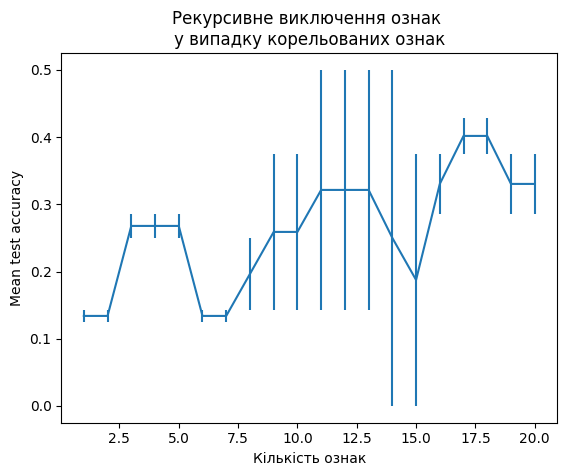

In [ ]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Кількість ознак")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Рекурсивне виключення ознак \nу випадку корельованих ознак")
plt.show()

In [ ]:
### Recursive Feature Elimination ###
rfe = RFE(estimator=DecisionTreeClassifier(), step=1, verbose = 2)
rfe.fit(X_gen, y_gen)
ranking_gen.append((rfecv.get_support(), 'RFE'))
rfe.ranking_

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


array([ 1,  8,  7,  4,  6,  5,  2,  3,  1, 11,  1,  1,  1,  1,  1,  1,  1,
        1,  9, 10])

In [ ]:
### Univariate Feature Selection ###
selector = SelectKBest(f_classif, k='all')
selector.fit(X_gen, y_gen)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
ranking_gen.append((selector.get_support(), 'SelectKBest'))

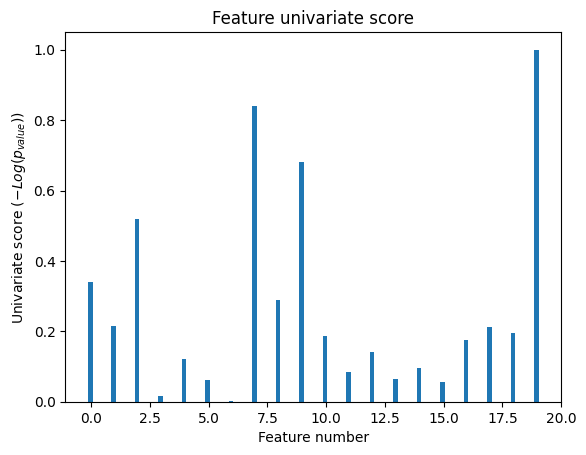

In [ ]:
X_indices = np.arange(X_gen.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [ ]:
### Sequential Feature Selection ###
sfs_backward = SequentialFeatureSelector(
    DecisionTreeClassifier(), n_features_to_select = 7, direction="backward", cv = 2).fit(X_gen, y_gen)
ranking_gen.append((sfs_backward.get_support(), 'SFS Backward'))
sfs_backward.get_support()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

array([False, False,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False,  True])

In [ ]:
### Sequential Feature Selection ###
sfs_forward = SequentialFeatureSelector(
    estimator = DecisionTreeClassifier(), n_features_to_select = 7, direction="forward", cv = 2).fit(X_gen, y_gen)
ranking_gen.append((sfs_forward.get_support(), 'SFS Forward'))
sfs_forward.get_support()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

array([ True, False,  True, False, False, False, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False,  True])

In [ ]:
### Select from model with l1 ###
sfm_lin = SelectFromModel(estimator=LinearSVC(penalty = 'l1', loss =  'squared_hinge', dual = False)).fit(X_gen, y_gen)
ranking_gen.append((sfm_lin.get_support(), 'SelectFromModel LinearSVC'))
sfm_lin.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
### Select from model with RFC estimator ###
sfm_rfc = SelectFromModel(estimator=RandomForestClassifier()).fit(X_gen, y_gen)
ranking_gen.append((sfm_rfc.get_support(), 'SelectFromModel RFC'))
sfm_rfc.get_support()

array([ True,  True,  True, False, False, False, False,  True,  True,
        True, False, False,  True, False, False, False, False,  True,
       False,  True])

In [ ]:
### mlxtend SequentialFeatureSelector ###
from mlxtend import feature_selection
sfs = mlxtend.feature_selection.SequentialFeatureSelector(estimator = DecisionTreeClassifier(), k_features = 'best', verbose = 2, cv = 2).fit(X_gen,y_gen)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
selected_features_indices = sfs.k_feature_idx_
selected_features_indices

(10, 12, 19)